# Part 3 - Binary Mathematical Morphology


## A)


Design an experiment, along with the appropriate code, to illustrate the idempotent natur of the binary Erosion and Dilation operations on a sample binary image of your choosing.


Applying Binary Erosion x5 times...


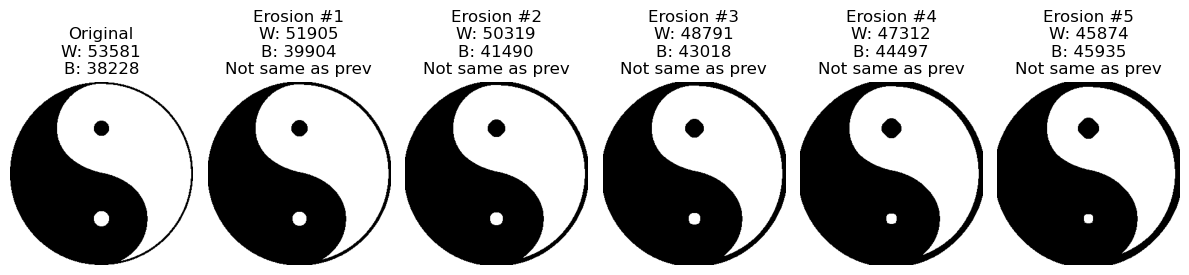

Applying Binary Dilation x5 times...


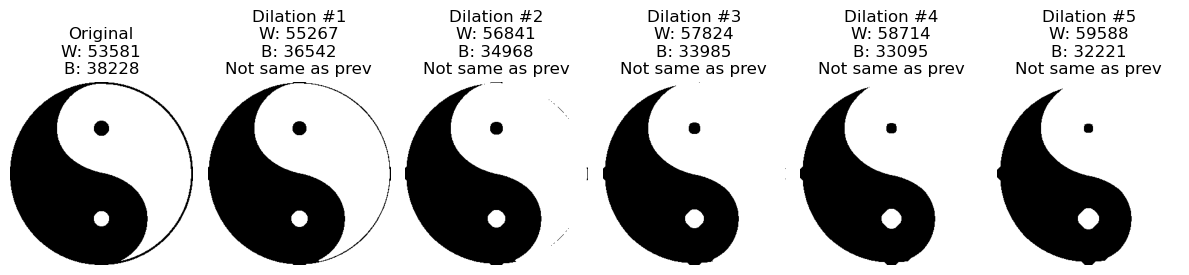

Applying Binary Opening x5 times...


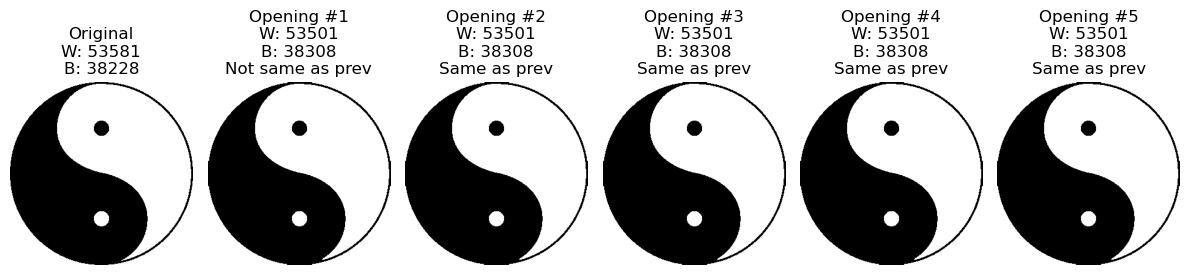

Applying Binary Closing x5 times...


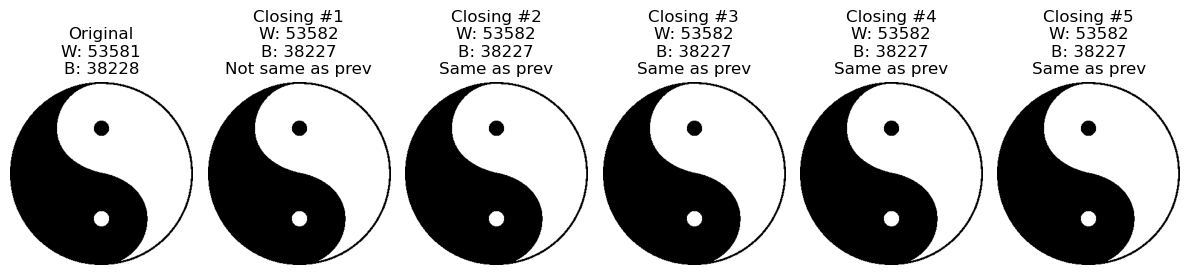

In [107]:
# import required packages
from skimage import img_as_ubyte, morphology
import skimage.io as io
import skimage.filters as filters
import skimage.color as color
import os
import matplotlib.pyplot as plt
import numpy as np

# set up dir
# EE425_DIR = os.path.join('C:\\', 'Users', 'adeli','Desktop','College','fourth_year','ee425-image-processing-and-analysis')
# ASSIGNMENT_DIR = os.path.join(EE425_DIR, 'ca_assignment')
ASSIGNMENT_DIR = os.getcwd()

def verify_operator_input(input_op: str):
  VALID_OPS = ['opening', 'closing', 'dilation', 'erosion']
  if input_op not in VALID_OPS:
    raise ValueError(f"Input operator must be one of: {VALID_OPS}")

def apply_binary_morph_operator(img, operator: str):
  """
  Apply a wanted morphology operator to a binary image.

  Parameters:
  ----------
  `img`: Binary Image

  `operator`: 'opening', 'closing', 'dilation', 'erosion'
  """
  
  if operator == 'erosion':
    return morphology.binary_erosion(img)
  elif operator == 'dilation':
    return morphology.binary_dilation(img)
  elif operator == 'opening':
    return morphology.binary_opening(img)
  elif operator == 'closing':
    return morphology.binary_closing(img)

def test_binary_morph_operators(img, no_of_tests: int, operator: str):
  """
  Test effects of multiple binary morphology operations on a binary image.

  Parameters
  ---------
  img: MUST BE A BINARY IMAGE
  """
  verify_operator_input(operator)
  operator_pretty = (operator[0].capitalize() + operator[1:])

  unique_vals = np.unique(img)
  # print(unique_vals)
  for val in unique_vals:
    if val != 0 and val != 255:
      print(f"ERROR: Unwanted pixel value found in image {val}. Please provide binary image.")
      return

  fig, ax = plt.subplots(nrows=1, ncols=no_of_tests + 1, figsize=(12, 7))

  total_white_pixels = np.sum(img == 255)
  total_black_pixels = np.sum(img == 0)

  print(f"Applying Binary {operator_pretty} x{no_of_tests} times...")
  ax[0].imshow(img, cmap=plt.cm.gray)
  ax[0].axis('off')
  ax[0].set_title(f'Original\nW: {total_white_pixels}\nB: {total_black_pixels}')

  for col in range(1, no_of_tests+1):
    prev = img
    img = apply_binary_morph_operator(img, operator)
    same_as_prev_str = 'Same as prev' if np.array_equal(prev, img) else 'Not same as prev'
    total_white_pixels = np.sum(img)
    total_black_pixels = np.sum(img != True)

    ax[col].imshow(img, cmap=plt.cm.gray)
    ax[col].axis('off')
    ax[col].set_title(f'{operator_pretty} #{col}\nW: {total_white_pixels}\nB: {total_black_pixels}\n{same_as_prev_str}')
  
  fig.tight_layout()
  io.show()

IMAGE_NAME = 'ying_yang.jpg'
original_image = io.imread(os.path.join(ASSIGNMENT_DIR, IMAGE_NAME))
# apply otsu threshold, and convert to binary
original_binary = img_as_ubyte(color.rgb2gray(original_image) > filters.threshold_otsu(color.rgb2gray(original_image)))

test_binary_morph_operators(original_binary, no_of_tests=5, operator='erosion')
test_binary_morph_operators(original_binary, no_of_tests=5, operator='dilation')
test_binary_morph_operators(original_binary, no_of_tests=5, operator='opening')
test_binary_morph_operators(original_binary, no_of_tests=5, operator='closing')


## B)


Devise and implement a testing strategy to prove the correct operation of the experiment designed in part (a).



Erosion...
Applying first Erosion oepration. This will be used as baseline image...
0/10 Erosion operations are the same as the previously operated image.
Image was not the same as previous operated image for 10 operations. Therefore Erosion is NOT idempotent!


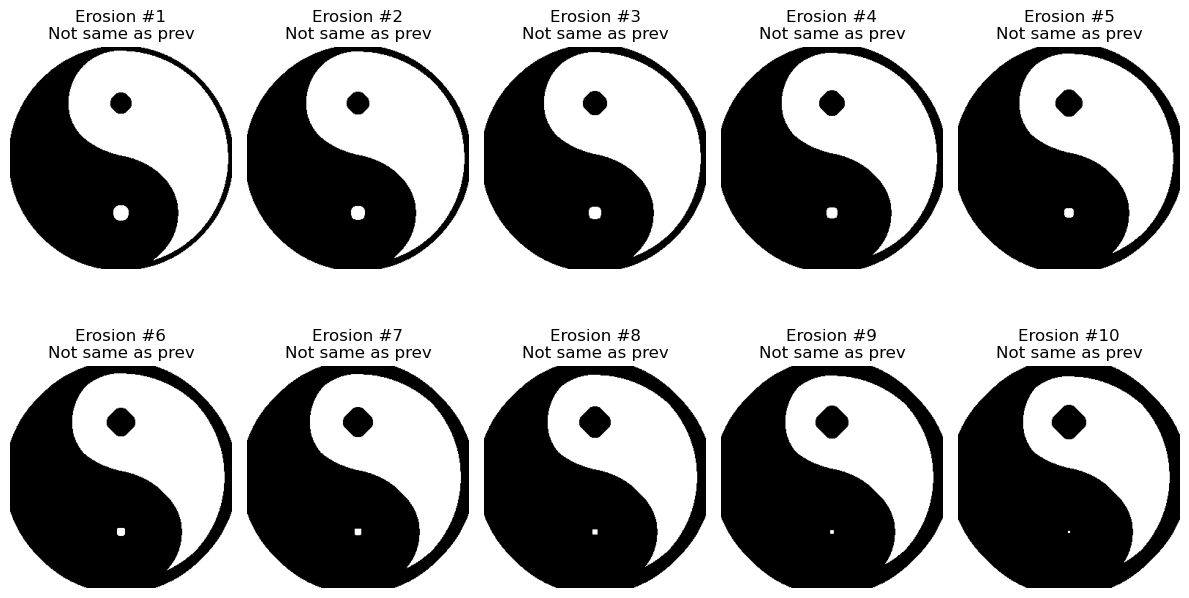



Dilation...
Applying first Dilation oepration. This will be used as baseline image...
0/10 Dilation operations are the same as the previously operated image.
Image was not the same as previous operated image for 10 operations. Therefore Dilation is NOT idempotent!


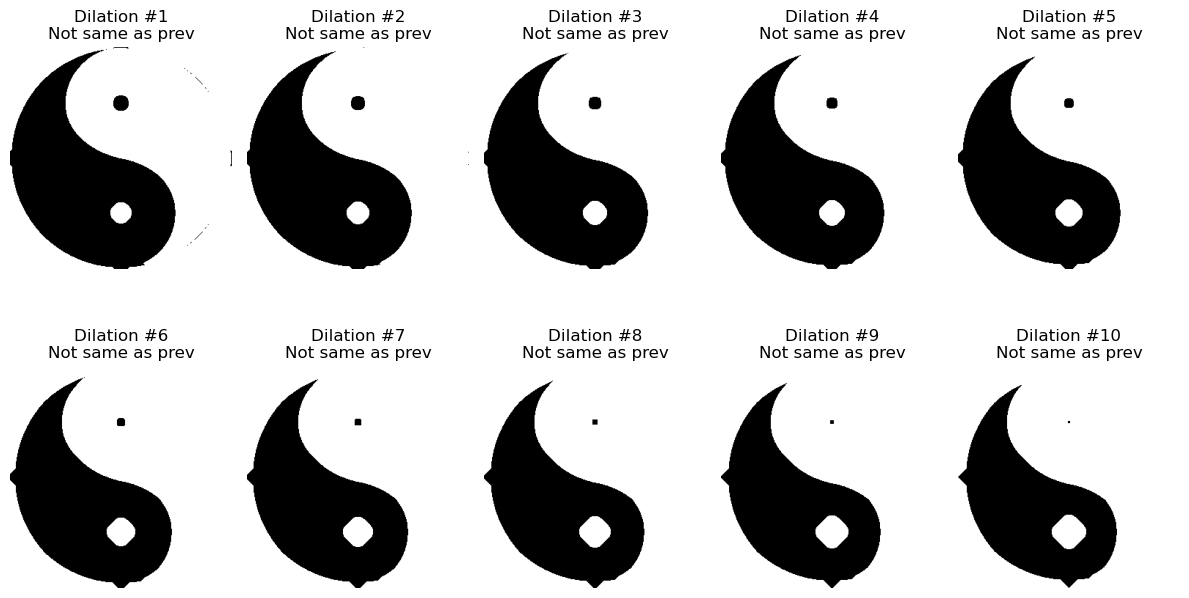



Opening...
Applying first Opening oepration. This will be used as baseline image...
10/10 Opening operations are the same as the previously operated image.
Image did not change after 10 Opening operations. Therefore Opening is idempotent!


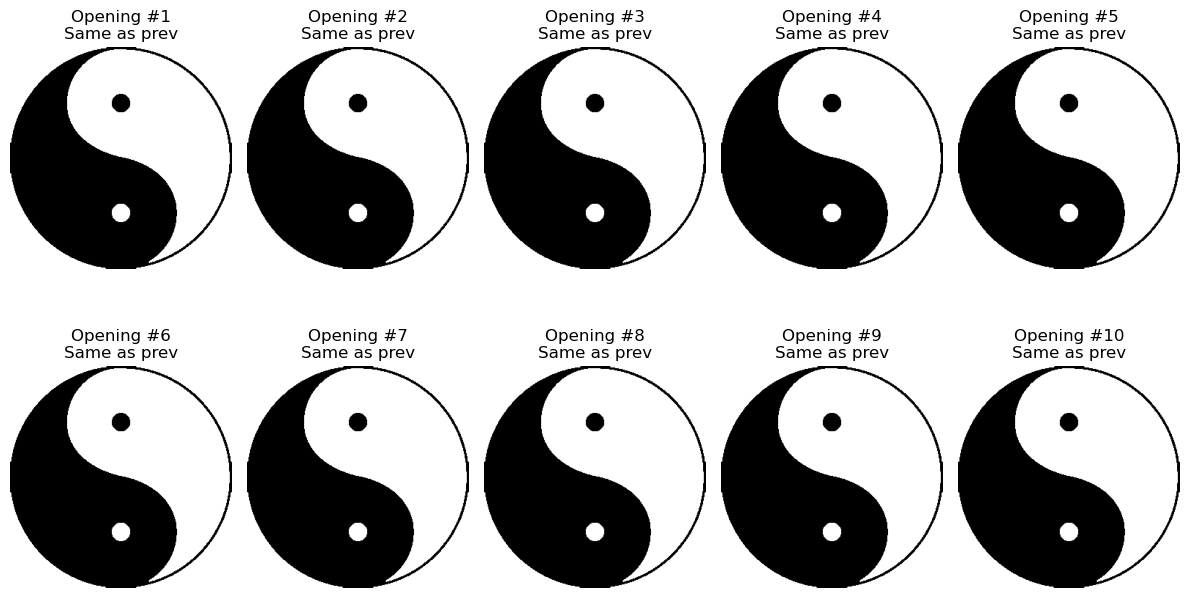



Closing...
Applying first Closing oepration. This will be used as baseline image...
10/10 Closing operations are the same as the previously operated image.
Image did not change after 10 Closing operations. Therefore Closing is idempotent!


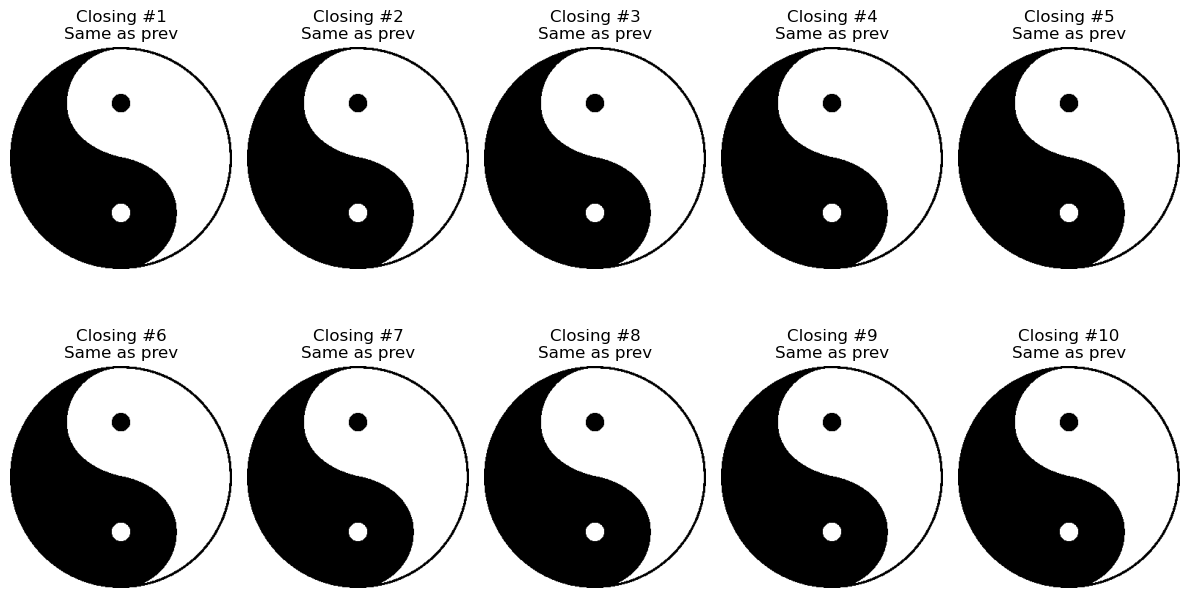

In [106]:

def test_strategy(img, no_of_tests: int, operator: str, display_images: bool):
  """
  Test the strategy above by checking which operations are
  idempotent and which ones aren't.
  """
  verify_operator_input(operator)
  operator_pretty = (operator[0].capitalize() + operator[1:])

  print(f"\n{operator_pretty}...")
  print("===================================")
  print(f"Applying first {operator_pretty} oepration. This will be used as baseline image...")
  operated_img = apply_binary_morph_operator(img, operator)
  same_as_prev_count = 0

  if display_images:
    fig, ax = plt.subplots(nrows=2, ncols=no_of_tests//2, figsize=(12, 7))
    if not os.path.exists('q3_tests'):
      os.makedirs('q3_tests')

  for idx in range(no_of_tests):
    row = idx // (no_of_tests // 2)
    col = idx % (no_of_tests // 2)
    prev = operated_img
    operated_img = apply_binary_morph_operator(operated_img, operator)

    same_as_prev = np.array_equal(prev, operated_img)
    same_as_prev_text = "Same as prev" if same_as_prev else "Not same as prev"

    if display_images:
      ax[row][col].imshow(operated_img, cmap=plt.cm.gray)
      ax[row][col].axis('off')
      ax[row][col].set_title(f'{operator_pretty} #{idx + 1}\n{same_as_prev_text}')

    if(same_as_prev):
      # Images are the same
      same_as_prev_count += 1
  print(f'{same_as_prev_count}/{no_of_tests} {operator_pretty} operations are the same as the previously operated image.')
  if same_as_prev_count == no_of_tests:
    print(f"Image did not change after {no_of_tests} {operator_pretty} operations. Therefore {operator_pretty} is idempotent!")
  else:
    print(f"Image was not the same as previous operated image for {no_of_tests - same_as_prev_count} operations. Therefore {operator_pretty} is NOT idempotent!")
  
  if display_images:
    fig.tight_layout()
    fig.savefig(os.path.join('q3_tests', f'testing_{operator}_{no_of_tests}_operations.png'))
    io.show()

  print("===================================\n")


test_strategy(original_binary, no_of_tests=10, operator='erosion', display_images=True)
test_strategy(original_binary, no_of_tests=10, operator='dilation', display_images=True)
test_strategy(original_binary, no_of_tests=10, operator='opening', display_images=True)
test_strategy(original_binary, no_of_tests=10, operator='closing', display_images=True)